In [10]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
ds = pd.read_csv('./train.csv')
data = ds.values
print data.shape
print data

results = []            #To store final results

(42000, 785)
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [7 0 0 ..., 0 0 0]
 [6 0 0 ..., 0 0 0]
 [9 0 0 ..., 0 0 0]]


In [3]:
y_train = data[10000:,0]
x_train = data[10000:,1:]
print y_train.shape, x_train.shape

x_test = data[:10000, 1:]
ans_test = data[:10000, 0]
print x_test.shape, ans_test.shape

(32000,) (32000, 784)
(10000, 784) (10000,)


In [5]:
def norm2_dist(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())

def n2knn(x_train, x, y_train, k=5):
    vals = []                                       #To collect list of [dist_with_point, mapped_answer_of_point]
    for ix in range(x_train.shape[0]):
        v = [dist(x, x_train[ix, :]), y_train[ix]]
        vals.append(v)                              # [[dist1, value1], [dist2, value2], ... , [distn, valuen]]
    
    updated_vals = sorted(vals, key=lambda x:x[0])
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr, return_counts=True)
    pred = pred_arr[1].argmax()
    return pred_arr[0][pred]

def wn2knn(x_train, x, y_train, k=5):
    vals = []
    for ix in range(x_train.shape[0]):
        di = dist(x, x_train[ix, :])
        wi = 1/(di + (10**(-6)))
        v = [wi, y_train[ix]]
        vals.append(v)

    updated_vals = sorted(vals, key=lambda x:x[0], reverse=True)
    updated_vals = updated_vals[:k]
    
    heavyweights = {}
    for ix in range(0,k):
        try:
            heavyweights[updated_vals[ix][1]] += updated_vals[ix][0]
        except:
            heavyweights[updated_vals[ix][1]] = updated_vals[ix][0]
    
    v=list(heavyweights.values())
    k=list(heavyweights.keys())
    best = k[v.index(max(v))]
    return best

In [6]:
def hellinger_dist(x1, x2):
    return np.sqrt(0.5*((np.sqrt(x1) - np.sqrt(x2))**2).sum())

def hknn(x_train, x, y_train, k=5):
    vals = []
    for ix in range(x_train.shape[0]):
        v = [hellinger_dist(x, x_train[ix, :]), y_train[ix]]
        vals.append(v)
    
    updated_vals = sorted(vals, key=lambda x:x[0])
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr, return_counts=True)
    pred = pred_arr[1].argmax()
    return pred_arr[0][pred]

def whknn(x_train, x, y_train, k=5):
    vals = []
    for ix in range(x_train.shape[0]):
        di = hellinger_dist(x, x_train[ix, :])
        wi = 1/(di + (10**(-6)))
        v = [wi, y_train[ix]]
        vals.append(v)

    updated_vals = sorted(vals, key=lambda x:x[0], reverse=True)
    updated_vals = updated_vals[:k]
    
    heavyweights = {}
    for ix in range(0,k):
        try:
            heavyweights[updated_vals[ix][1]] += updated_vals[ix][0]
        except:
            heavyweights[updated_vals[ix][1]] = updated_vals[ix][0]
    
    v=list(heavyweights.values())
    k=list(heavyweights.keys())
    best = k[v.index(max(v))]
    return best

In [7]:
def manhattan_dist(x1, x2):
    return abs(x1-x2).sum()

def mknn(x_train, x, y_train, k=5):
    vals = []
    for ix in range(x_train.shape[0]):
        v = [manhattan_dist(x, x_train[ix, :]), y_train[ix]]
        vals.append(v)
    
    updated_vals = sorted(vals, key=lambda x:x[0])
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr, return_counts=True)
    pred = pred_arr[1].argmax()
    return pred_arr[0][pred]

def wmknn(x_train, x, y_train, k=5):
    vals = []
    for ix in range(x_train.shape[0]):
        di = manhattan_dist(x, x_train[ix, :])
        wi = 1/(di + (10**(-6)))
        v = [wi, y_train[ix]]
        vals.append(v)

    updated_vals = sorted(vals, key=lambda x:x[0], reverse=True)
    updated_vals = updated_vals[:k]
    
    heavyweights = {}
    for ix in range(0,k):
        try:
            heavyweights[updated_vals[ix][1]] += updated_vals[ix][0]
        except:
            heavyweights[updated_vals[ix][1]] = updated_vals[ix][0]
    
    v=list(heavyweights.values())
    k=list(heavyweights.keys())
    best = k[v.index(max(v))]
    return best

In [28]:
def norm4_dist(x1, x2):
    return np.sqrt(np.sqrt(((x1-x2)**4).sum()))

def n4knn(x_train, x, y_train, k=5):
    vals = []
    for ix in range(x_train.shape[0]):
        v = [norm4_dist(x, x_train[ix, :]), y_train[ix]]
        vals.append(v)
    
    updated_vals = sorted(vals, key=lambda x:x[0])
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr, return_counts=True)
    pred = pred_arr[1].argmax()
    return pred_arr[0][pred]

def wn4knn(x_train, x, y_train, k=5):
    vals = []
    for ix in range(x_train.shape[0]):
        di = norm4_dist(x, x_train[ix, :])
        wi = 1/(di + (10**(-8)))
        v = [wi, y_train[ix]]
        vals.append(v)

    updated_vals = sorted(vals, key=lambda x:x[0], reverse=True)
    updated_vals = updated_vals[:k]
    
    heavyweights = {}
    for ix in range(0,k):
        try:
            heavyweights[updated_vals[ix][1]] += updated_vals[ix][0]
        except:
            heavyweights[updated_vals[ix][1]] = updated_vals[ix][0]
    
    v=list(heavyweights.values())
    k=list(heavyweights.keys())
    best = k[v.index(max(v))]
    return best

1.0
1


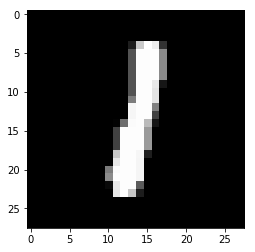

In [8]:
#This cell is just for demostration

idq = int(np.random.random()*x_train.shape[0])
q = x_train[idq]
res = knn(x_train[:10000], q, y_train[:10000], k=7)
print res
print y_train[idq]

plt.figure(0)
plt.imshow(q.reshape((28,28)), cmap='gray')
plt.show()

In [20]:
correct = 0
incorrect = 0
start_time = datetime.datetime.now()
print 'Starting at ' + start_time.strftime("%H:%M:%S")

for ix in range(x_test.shape[0]):
    if ix % 500 == 0 and ix>0:
        print 'Hit ' + str(ix) + '. Till now C:' + str(correct) + ' I:' + str(incorrect) + ' A:' + str((float(correct)/ix)*100)
    q = x_test[ix]
    res = n2knn(x_train[:10000], q, y_train[:10000], k=7)
    if res == ans_test[ix]:
        correct += 1
    else:
        incorrect += 1

print 'Correct: ' + str(correct)
print 'Incorrect: ' + str(incorrect)
accuracy = ( float(correct) / (correct + incorrect) )*100
print 'Accuracy for Norm-2 Dist: ' + str(accuracy)

end_time = datetime.datetime.now()
print 'Finishing at ' + end_time.strftime("%H:%M:%S")

temp = {}
temp['distance'] = 'Norm-2'
temp['accuracy'] = accuracy
temp['duration'] = end_time - start_time
results.append(temp)

Starting at 17:57:55
Hit 500. Till now C:475 I:25 A:95.0
Hit 1000. Till now C:951 I:49 A:95.1
Hit 1500. Till now C:1417 I:83 A:94.4666666667
Hit 2000. Till now C:1893 I:107 A:94.65
Hit 2500. Till now C:2368 I:132 A:94.72
Hit 3000. Till now C:2850 I:150 A:95.0
Hit 3500. Till now C:3326 I:174 A:95.0285714286
Hit 4000. Till now C:3795 I:205 A:94.875
Hit 4500. Till now C:4275 I:225 A:95.0
Hit 5000. Till now C:4746 I:254 A:94.92
Hit 5500. Till now C:5220 I:280 A:94.9090909091
Hit 6000. Till now C:5699 I:301 A:94.9833333333
Hit 6500. Till now C:6171 I:329 A:94.9384615385
Hit 7000. Till now C:6639 I:361 A:94.8428571429
Hit 7500. Till now C:7108 I:392 A:94.7733333333
Hit 8000. Till now C:7574 I:426 A:94.675
Hit 8500. Till now C:8046 I:454 A:94.6588235294
Hit 9000. Till now C:8520 I:480 A:94.6666666667
Hit 9500. Till now C:8996 I:504 A:94.6947368421
Correct: 9470
Incorrect: 530
Accuracy for Norm-2 Dist: 94.7
Finishing at 18:26:30


In [21]:
correct = 0
incorrect = 0
start_time = datetime.datetime.now()
print 'Starting at ' + start_time.strftime("%H:%M:%S")

for ix in range(x_test.shape[0]):
    if ix % 500 == 0 and ix>0:
        print 'Hit ' + str(ix) + '. Till now C:' + str(correct) + ' I:' + str(incorrect) + ' A:' + str((float(correct)/ix)*100)
    q = x_test[ix]
    res = wn2knn(x_train[:10000], q, y_train[:10000], k=7)
    if res == ans_test[ix]:
        correct += 1
    else:
        incorrect += 1

print 'Correct: ' + str(correct)
print 'Incorrect: ' + str(incorrect)
accuracy = ( float(correct) / (correct+incorrect) )*100
print 'Accuracy for Weighted Norm-2 Dist: ' + str(accuracy)

end_time = datetime.datetime.now()
print 'Finishing at ' + end_time.strftime("%H:%M:%S")

temp = {}
temp['distance'] = 'Weighted Norm-2'
temp['accuracy'] = accuracy
temp['duration'] = end_time - start_time
results.append(temp)

Starting at 18:26:30
Hit 500. Till now C:478 I:22 A:95.6
Hit 1000. Till now C:957 I:43 A:95.7
Hit 1500. Till now C:1427 I:73 A:95.1333333333
Hit 2000. Till now C:1903 I:97 A:95.15
Hit 2500. Till now C:2378 I:122 A:95.12
Hit 3000. Till now C:2863 I:137 A:95.4333333333
Hit 3500. Till now C:3341 I:159 A:95.4571428571
Hit 4000. Till now C:3811 I:189 A:95.275
Hit 4500. Till now C:4291 I:209 A:95.3555555556
Hit 5000. Till now C:4764 I:236 A:95.28
Hit 5500. Till now C:5239 I:261 A:95.2545454545
Hit 6000. Till now C:5721 I:279 A:95.35
Hit 6500. Till now C:6196 I:304 A:95.3230769231
Hit 7000. Till now C:6666 I:334 A:95.2285714286
Hit 7500. Till now C:7135 I:365 A:95.1333333333
Hit 8000. Till now C:7604 I:396 A:95.05
Hit 8500. Till now C:8078 I:422 A:95.0352941176
Hit 9000. Till now C:8555 I:445 A:95.0555555556
Hit 9500. Till now C:9031 I:469 A:95.0631578947
Correct: 9506
Incorrect: 494
Accuracy for Weighted Norm-2 Dist: 95.06
Finishing at 18:55:01


In [23]:
correct = 0
incorrect = 0
start_time = datetime.datetime.now()
print 'Starting at ' + start_time.strftime("%H:%M:%S")

for ix in range(x_test.shape[0]):
    if ix % 500 == 0 and ix>0:
        print 'Hit ' + str(ix) + '. Till now C:' + str(correct) + ' I:' + str(incorrect) + ' A:' + str((float(correct)/ix)*100)
    q = x_test[ix]
    res = hknn(x_train[:10000], q, y_train[:10000], k=7)
    if res == ans_test[ix]:
        correct += 1
    else:
        incorrect += 1

print 'Correct: ' + str(correct)
print 'Incorrect: ' + str(incorrect)
accuracy = ( float(correct) / (correct+incorrect) )*100
print 'Accuracy for Hellinger Dist: ' + str(accuracy)

end_time = datetime.datetime.now()
print 'Finishing at ' + end_time.strftime("%H:%M:%S")

temp = {}
temp['distance'] = 'Hellinger Distance'
temp['accuracy'] = accuracy
temp['duration'] = end_time - start_time
results.append(temp)

Starting at 18:58:36
Hit 500. Till now C:479 I:21 A:95.8
Hit 1000. Till now C:959 I:41 A:95.9
Hit 1500. Till now C:1437 I:63 A:95.8
Hit 2000. Till now C:1914 I:86 A:95.7
Hit 2500. Till now C:2393 I:107 A:95.72
Hit 3000. Till now C:2876 I:124 A:95.8666666667
Hit 3500. Till now C:3353 I:147 A:95.8
Hit 4000. Till now C:3822 I:178 A:95.55
Hit 4500. Till now C:4302 I:198 A:95.6
Hit 5000. Till now C:4778 I:222 A:95.56
Hit 5500. Till now C:5257 I:243 A:95.5818181818
Hit 6000. Till now C:5740 I:260 A:95.6666666667
Hit 6500. Till now C:6216 I:284 A:95.6307692308
Hit 7000. Till now C:6687 I:313 A:95.5285714286
Hit 7500. Till now C:7161 I:339 A:95.48
Hit 8000. Till now C:7628 I:372 A:95.35
Hit 8500. Till now C:8103 I:397 A:95.3294117647
Hit 9000. Till now C:8579 I:421 A:95.3222222222
Hit 9500. Till now C:9058 I:442 A:95.3473684211
Correct: 9537
Incorrect: 463
Accuracy for Hellinger Dist: 95.37
Finishing at 19:29:58


In [24]:
correct = 0
incorrect = 0
start_time = datetime.datetime.now()
print 'Starting at ' + start_time.strftime("%H:%M:%S")

for ix in range(x_test.shape[0]):
    if ix % 500 == 0 and ix>0:
        print 'Hit ' + str(ix) + '. Till now C:' + str(correct) + ' I:' + str(incorrect) + ' A:' + str((float(correct)/ix)*100)
    q = x_test[ix]
    res = whknn(x_train[:10000], q, y_train[:10000], k=7)
    if res == ans_test[ix]:
        correct += 1
    else:
        incorrect += 1

print 'Correct: ' + str(correct)
print 'Incorrect: ' + str(incorrect)
accuracy = ( float(correct) / (correct+incorrect) )*100
print 'Accuracy for Weighted Hellinger Dist: ' + str(accuracy)

end_time = datetime.datetime.now()
print 'Finishing at ' + end_time.strftime("%H:%M:%S")

temp = {}
temp['distance'] = 'Weighted Hellinger Distance'
temp['accuracy'] = accuracy
temp['duration'] = end_time - start_time
results.append(temp)

Starting at 19:29:58
Hit 500. Till now C:480 I:20 A:96.0
Hit 1000. Till now C:961 I:39 A:96.1
Hit 1500. Till now C:1440 I:60 A:96.0
Hit 2000. Till now C:1920 I:80 A:96.0
Hit 2500. Till now C:2400 I:100 A:96.0
Hit 3000. Till now C:2886 I:114 A:96.2
Hit 3500. Till now C:3364 I:136 A:96.1142857143
Hit 4000. Till now C:3836 I:164 A:95.9
Hit 4500. Till now C:4315 I:185 A:95.8888888889
Hit 5000. Till now C:4792 I:208 A:95.84
Hit 5500. Till now C:5273 I:227 A:95.8727272727
Hit 6000. Till now C:5757 I:243 A:95.95
Hit 6500. Till now C:6233 I:267 A:95.8923076923
Hit 7000. Till now C:6705 I:295 A:95.7857142857
Hit 7500. Till now C:7178 I:322 A:95.7066666667
Hit 8000. Till now C:7647 I:353 A:95.5875
Hit 8500. Till now C:8124 I:376 A:95.5764705882
Hit 9000. Till now C:8602 I:398 A:95.5777777778
Hit 9500. Till now C:9083 I:417 A:95.6105263158
Correct: 9563
Incorrect: 437
Accuracy for Weighted Hellinger Dist: 95.63
Finishing at 20:05:04


In [25]:
correct = 0
incorrect = 0
start_time = datetime.datetime.now()
print 'Starting at ' + start_time.strftime("%H:%M:%S")

for ix in range(x_test.shape[0]):
    if ix % 500 == 0 and ix>0:
        print 'Hit ' + str(ix) + '. Till now C:' + str(correct) + ' I:' + str(incorrect) + ' A:' + str((float(correct)/ix)*100)
    q = x_test[ix]
    res = mknn(x_train[:10000], q, y_train[:10000], k=7)
    if res == ans_test[ix]:
        correct += 1
    else:
        incorrect += 1

print 'Correct: ' + str(correct)
print 'Incorrect: ' + str(incorrect)
accuracy = ( float(correct) / (correct+incorrect) )*100
print 'Accuracy for Manhattan Dist: ' + str(accuracy)

end_time = datetime.datetime.now()
print 'Finishing at ' + end_time.strftime("%H:%M:%S")

temp = {}
temp['distance'] = 'Manhattan Distance'
temp['accuracy'] = accuracy
temp['duration'] = end_time - start_time
results.append(temp)

Starting at 20:05:04
Hit 500. Till now C:472 I:28 A:94.4
Hit 1000. Till now C:940 I:60 A:94.0
Hit 1500. Till now C:1404 I:96 A:93.6
Hit 2000. Till now C:1872 I:128 A:93.6
Hit 2500. Till now C:2341 I:159 A:93.64
Hit 3000. Till now C:2815 I:185 A:93.8333333333
Hit 3500. Till now C:3284 I:216 A:93.8285714286
Hit 4000. Till now C:3746 I:254 A:93.65
Hit 4500. Till now C:4221 I:279 A:93.8
Hit 5000. Till now C:4686 I:314 A:93.72
Hit 5500. Till now C:5152 I:348 A:93.6727272727
Hit 6000. Till now C:5625 I:375 A:93.75
Hit 6500. Till now C:6093 I:407 A:93.7384615385
Hit 7000. Till now C:6554 I:446 A:93.6285714286
Hit 7500. Till now C:7018 I:482 A:93.5733333333
Hit 8000. Till now C:7479 I:521 A:93.4875
Hit 8500. Till now C:7948 I:552 A:93.5058823529
Hit 9000. Till now C:8421 I:579 A:93.5666666667
Hit 9500. Till now C:8890 I:610 A:93.5789473684
Correct: 9357
Incorrect: 643
Accuracy for Manhattan Dist: 93.57
Finishing at 20:27:33


In [26]:
correct = 0
incorrect = 0
start_time = datetime.datetime.now()
print 'Starting at ' + start_time.strftime("%H:%M:%S")

for ix in range(x_test.shape[0]):
    if ix % 500 == 0 and ix>0:
        print 'Hit ' + str(ix) + '. Till now C:' + str(correct) + ' I:' + str(incorrect) + ' A:' + str((float(correct)/ix)*100)
    q = x_test[ix]
    res = wmknn(x_train[:10000], q, y_train[:10000], k=7)
    if res == ans_test[ix]:
        correct += 1
    else:
        incorrect += 1

print 'Correct: ' + str(correct)
print 'Incorrect: ' + str(incorrect)
accuracy = ( float(correct) / (correct+incorrect) )*100
print 'Accuracy for Weighted Manhattan Dist: ' + str(accuracy)

end_time = datetime.datetime.now()
print 'Finishing at ' + end_time.strftime("%H:%M:%S")

temp = {}
temp['distance'] = 'Weighted Manhattan Distance'
temp['accuracy'] = accuracy
temp['duration'] = end_time - start_time
results.append(temp)

Starting at 20:27:33
Hit 500. Till now C:478 I:22 A:95.6
Hit 1000. Till now C:947 I:53 A:94.7
Hit 1500. Till now C:1412 I:88 A:94.1333333333
Hit 2000. Till now C:1882 I:118 A:94.1
Hit 2500. Till now C:2351 I:149 A:94.04
Hit 3000. Till now C:2829 I:171 A:94.3
Hit 3500. Till now C:3300 I:200 A:94.2857142857
Hit 4000. Till now C:3762 I:238 A:94.05
Hit 4500. Till now C:4236 I:264 A:94.1333333333
Hit 5000. Till now C:4705 I:295 A:94.1
Hit 5500. Till now C:5172 I:328 A:94.0363636364
Hit 6000. Till now C:5646 I:354 A:94.1
Hit 6500. Till now C:6117 I:383 A:94.1076923077
Hit 7000. Till now C:6580 I:420 A:94.0
Hit 7500. Till now C:7045 I:455 A:93.9333333333
Hit 8000. Till now C:7510 I:490 A:93.875
Hit 8500. Till now C:7981 I:519 A:93.8941176471
Hit 9000. Till now C:8456 I:544 A:93.9555555556
Hit 9500. Till now C:8926 I:574 A:93.9578947368
Correct: 9397
Incorrect: 603
Accuracy for Weighted Manhattan Dist: 93.97
Finishing at 20:55:16


In [29]:
correct = 0
incorrect = 0
start_time = datetime.datetime.now()
print 'Starting at ' + start_time.strftime("%H:%M:%S")

for ix in range(x_test.shape[0]):
    if ix % 500 == 0 and ix>0:
        print 'Hit ' + str(ix) + '. Till now C:' + str(correct) + ' I:' + str(incorrect) + ' A:' + str((float(correct)/ix)*100)
    q = x_test[ix]
    res = wn4knn(x_train[:10000], q, y_train[:10000], k=7)
    if res == ans_test[ix]:
        correct += 1
    else:
        incorrect += 1

print 'Correct: ' + str(correct)
print 'Incorrect: ' + str(incorrect)
accuracy = ( float(correct) / (correct+incorrect) )*100
print 'Accuracy for Weighted Norm-4 Dist: ' + str(accuracy)

end_time = datetime.datetime.now()
print 'Finishing at ' + end_time.strftime("%H:%M:%S")

temp = {}
temp['distance'] = 'Weighted Norm-4 Distance'
temp['accuracy'] = accuracy
temp['duration'] = end_time - start_time
results.append(temp)

Starting at 20:59:25
Hit 500. Till now C:480 I:20 A:96.0
Hit 1000. Till now C:962 I:38 A:96.2
Hit 1500. Till now C:1443 I:57 A:96.2
Hit 2000. Till now C:1920 I:80 A:96.0
Hit 2500. Till now C:2396 I:104 A:95.84
Hit 3000. Till now C:2878 I:122 A:95.9333333333
Hit 3500. Till now C:3357 I:143 A:95.9142857143
Hit 4000. Till now C:3827 I:173 A:95.675
Hit 4500. Till now C:4307 I:193 A:95.7111111111
Hit 5000. Till now C:4781 I:219 A:95.62
Hit 5500. Till now C:5257 I:243 A:95.5818181818
Hit 6000. Till now C:5737 I:263 A:95.6166666667
Hit 6500. Till now C:6215 I:285 A:95.6153846154
Hit 7000. Till now C:6687 I:313 A:95.5285714286
Hit 7500. Till now C:7166 I:334 A:95.5466666667
Hit 8000. Till now C:7637 I:363 A:95.4625
Hit 8500. Till now C:8114 I:386 A:95.4588235294
Hit 9000. Till now C:8590 I:410 A:95.4444444444
Hit 9500. Till now C:9070 I:430 A:95.4736842105
Correct: 9550
Incorrect: 450
Accuracy for Weighted Norm-4 Dist: 95.5
Finishing at 21:35:41


In [43]:
print 'Training Data: 10000 digits (28x28) pixel points per digit'
print 'Testing Data: 10000 digits'
print '-'*20

results = sorted(results, key=lambda x:x['accuracy'], reverse=True)
for item in results:
    print 'Distance Function: ' + item['distance']
    print 'Accuracy: ' + str(item['accuracy'])
    print 'Time Taken: ' + str(item['duration'].seconds) + ' seconds'
    print '-'*20

Training Data: 10000 digits (28x28) pixel points per digit
Testing Data: 10000 digits
--------------------
Distance Function: Weighted Hellinger Distance
Accuracy: 95.63
Time Taken: 2105 seconds
--------------------
Distance Function: Weighted Norm-4 Distance
Accuracy: 95.5
Time Taken: 2175 seconds
--------------------
Distance Function: Hellinger Distance
Accuracy: 95.37
Time Taken: 1881 seconds
--------------------
Distance Function: Weighted Norm-2
Accuracy: 95.06
Time Taken: 1711 seconds
--------------------
Distance Function: Norm-2
Accuracy: 94.7
Time Taken: 1714 seconds
--------------------
Distance Function: Weighted Manhattan Distance
Accuracy: 93.97
Time Taken: 1662 seconds
--------------------
Distance Function: Manhattan Distance
Accuracy: 93.57
Time Taken: 1349 seconds
--------------------
